In [1]:
%matplotlib inline
%reload_ext autoreload
%reload_ext snakeviz
%autoreload 2
%qtconsole

In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

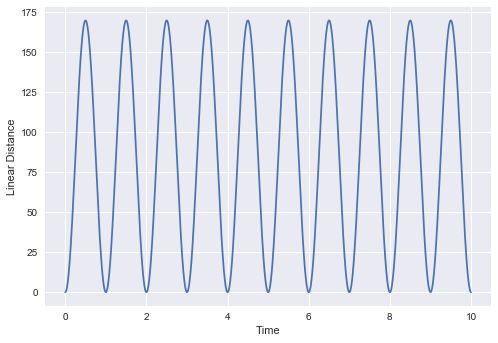

In [41]:
SAMPLING_FREQUENCY = 1500
N_SAMPLES = 15000
TRACK_HEIGHT = 170

time = np.arange(N_SAMPLES) / SAMPLING_FREQUENCY
linear_distance = (TRACK_HEIGHT / 2) * np.sin(2 * np.pi * time - (np.pi) / 2) + (TRACK_HEIGHT / 2)
plt.plot(time, linear_distance);
plt.ylabel('Linear Distance')
plt.xlabel('Time');

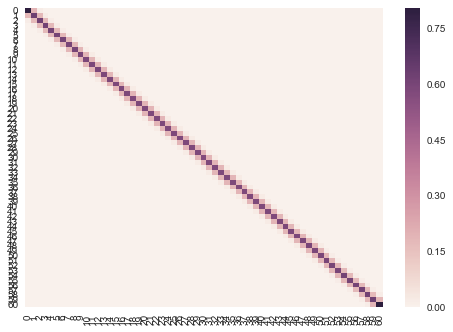

In [49]:
from src.ripple_decoding import empirical_movement_transition_matrix

sequence_compression_factor = 1
n_place_bins = 61

place_bin_edges = np.linspace(
        np.floor(linear_distance.min()),
        np.ceil(linear_distance.max()),
        n_place_bins + 1)

state_transition_matrix = empirical_movement_transition_matrix(
            linear_distance, place_bin_edges,
            sequence_compression_factor=sequence_compression_factor)

sns.heatmap(state_transition_matrix);

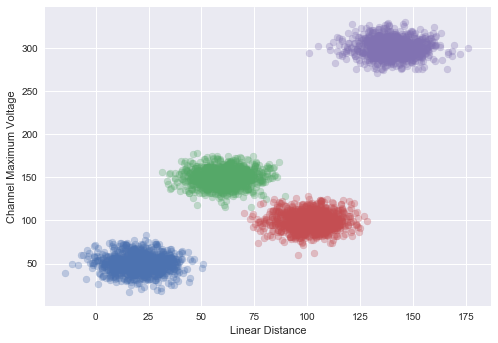

In [52]:
from scipy.stats import multivariate_normal

for distance, mark1 in zip(np.arange(20, 160, 40), [50, 150, 100, 300]):
    m = multivariate_normal.rvs(mean=[distance, mark1], cov=100, size=1000)
    plt.scatter(m[:, 0], m[:, 1], alpha=0.3)
    plt.xlabel('Linear Distance')
    plt.ylabel('Channel Maximum Voltage');